### Q1. What is Gradient Boosting Regression?

Gradient Boosting Regression is an ensemble learning technique used for regression tasks. It builds models in a sequential manner, where each new model corrects the errors of the previous models. Gradient Boosting works by fitting a new model to the residuals (errors) of the previous models, thus reducing the overall error step by step. The key idea is to minimize a loss function by adding weak learners (typically decision trees) in a stage-wise fashion, and the optimization is performed using gradient descent.



### Q2. Implement a Simple Gradient Boosting Algorithm from Scratch Using Python and NumPy

#### Step-by-Step Implementation

**1. Import Necessary Libraries:**




In [ ]:
import numy as np
from sklearn.metrics import mean_squared_error, r2_score


**2. Generate a Simple Dataset:**

# Generate some sample data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2


**3. Define Gradient Boosting Regressor:**



In [ ]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        # Initialize residuals as the target values
        residuals = y
        for _ in range(self.n_estimators):
            # Train a decision tree on the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions
            self.models.append(tree)

    def predict(self, X):
        # Initialize predictions with zeros
        y_pred = np.zeros(X.shape[0])
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

# A simple DecisionTreeRegressor for demonstration
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeRegressor as SklearnTree
        self.tree = SklearnTree(max_depth=self.max_depth)
        self.tree.fit(X, y)

    def predict(self, X):
        return self.tree.predict(X)


**4. Train the Model:**


In [ ]:

# Initialize and train the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X, y)


**5. Evaluate the Model:**

In [ ]:
# Make predictions
y_pred = gbr.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


### Q3. Experiment with Different Hyperparameters

To optimize the model's performance, we can use Grid Search or Random Search to find the best hyperparameters. Here, I'll demonstrate using Grid Search.

**1. Define the Grid Search Function:**



In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search_gbr(X, y):
    from sklearn.ensemble import GradientBoostingRegressor as SklearnGBR

    # Define the model
    gbr = SklearnGBR()

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }

    # Initialize Grid Search
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=5)

    # Fit the Grid Search to the data
    grid_search.fit(X, y)

    # Print the best parameters and the best score
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Best R-squared: {grid_search.best_score_:.2f}')

# Perform Grid Search
grid_search_gbr(X, y)



By running the grid search, you will find the optimal hyperparameters for your Gradient Boosting model. You can then use these parameters to re-train your model and achieve better performance.

### Q4. What is a Weak Learner in Gradient Boosting?

A weak learner in Gradient Boosting is a model that performs slightly better than random guessing. Typically, decision trees with limited depth (often called decision stumps) are used as weak learners. Despite their simplicity and limited predictive power on their own, these weak learners can be combined in an ensemble to produce a strong model with high accuracy.

### Q5. What is the Intuition Behind the Gradient Boosting Algorithm?

The intuition behind Gradient Boosting is to sequentially add models that correct the errors of the combined ensemble of previous models. Each new model is trained to predict the residual errors (i.e., the difference between the actual target values and the predictions made by the ensemble so far). By focusing on the mistakes made by the current ensemble, Gradient Boosting effectively reduces the overall prediction error and improves the model's performance.

### Q6. How Does the Gradient Boosting Algorithm Build an Ensemble of Weak Learners?

Gradient Boosting builds an ensemble of weak learners in a step-by-step process as follows:

1. **Initialization:** Start with an initial model (often a simple model that predicts the mean of the target variable).
2. **Compute Residuals:** Calculate the residuals, which are the differences between the actual target values and the predictions made by the current ensemble.
3. **Train a Weak Learner:** Fit a new weak learner to the residuals computed in the previous step.
4. **Update Ensemble:** Add the new weak learner to the ensemble. The ensemble's prediction is updated by adding a fraction of the new learner's prediction (scaled by the learning rate).
5. **Repeat:** Iterate the process of computing residuals, training a new weak learner, and updating the ensemble until the specified number of learners is reached or the error reduction plateaus.



### Q7. What are the Steps Involved in Constructing the Mathematical Intuition of the Gradient Boosting Algorithm?

Constructing the mathematical intuition of the Gradient Boosting algorithm involves understanding the following steps:

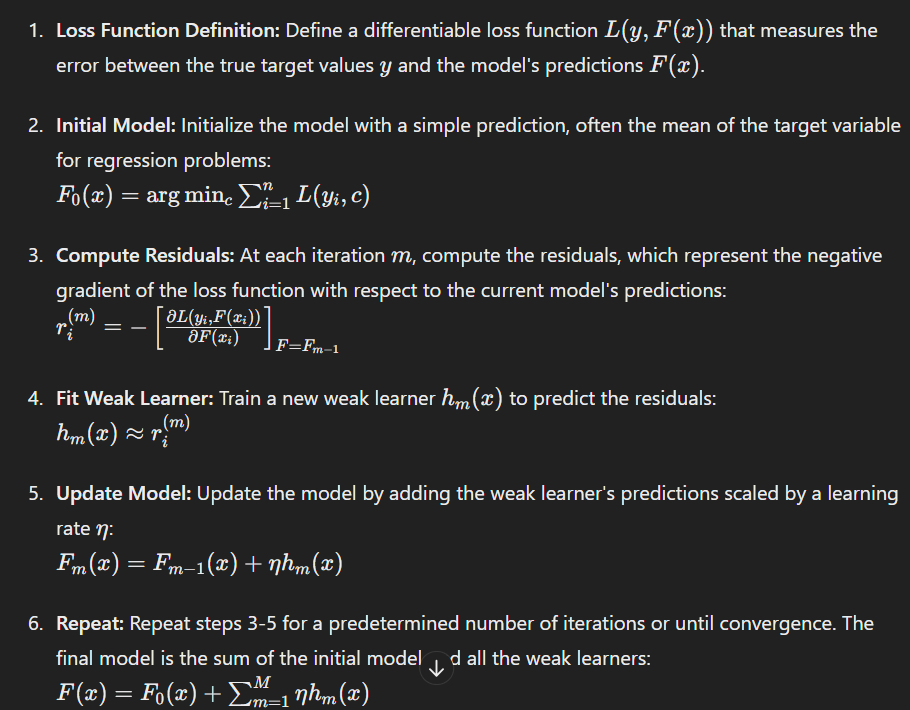

### Gradient Boosting Algorithm: Python Example

Here’s an example of a simple Gradient Boosting implementation for a regression task using Python and NumPy, followed by hyperparameter tuning using Grid Search.



In [ ]:
#### Data Generation

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import itertools

# Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2


#### Gradient Boosting Regressor Class

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
    
    def fit(self, X, y):
        # Initialize the model with the mean of y
        self.F0 = np.mean(y)
        self.models = []
        Fm = np.full_like(y, self.F0)
        
        for _ in range(self.n_estimators):
            residuals = y - Fm
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            predictions = tree.predict(X)
            Fm += self.learning_rate * predictions
            self.models.append(tree)
    
    def predict(self, X):
        Fm = np.full((X.shape[0],), self.F0)
        for tree in self.models:
            Fm += self.learning_rate * tree.predict(X)
        return Fm

# Initialize and train the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X, y)

# Make predictions
y_pred = gbr.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


#### Hyperparameter Tuning

def grid_search_gbr(X, y):
    from sklearn.ensemble import GradientBoostingRegressor as SklearnGBR
    from sklearn.model_selection import GridSearchCV
    
    # Define the model
    gbr = SklearnGBR()
    
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
    
    # Initialize Grid Search
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=5)
    
    # Fit the Grid Search to the data
    grid_search.fit(X, y)
    
    # Print the best parameters and the best score
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Best R-squared: {grid_search.best_score_:.2f}')
    
# Perform Grid Search
grid_search_gbr(X, y)
 



This implementation covers the key aspects of Gradient Boosting and demonstrates how to optimize its performance using Grid Search. By adjusting hyperparameters such as the number of estimators, learning rate, and tree depth, you can fine-tune the model for better accuracy and generalization.